<a href="https://colab.research.google.com/github/AVJdataminer/Tunisia_hydro/blob/master/Download_Landast_scenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#!apt-get -qq install rasterio
#!pip install earthpy
#!pip install shapely
#!pip install landsatxplore
#!pip install earthpy
!pip install rasterio

Selecting previously unselected package python-bs4.
(Reading database ... 130912 files and directories currently installed.)
Preparing to unpack .../00-python-bs4_4.6.0-1_all.deb ...
Unpacking python-bs4 (4.6.0-1) ...
Selecting previously unselected package python-pkg-resources.
Preparing to unpack .../01-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-chardet.
Preparing to unpack .../02-python-chardet_3.0.4-1_all.deb ...
Unpacking python-chardet (3.0.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../03-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-webencodings.
Preparing to unpack .../04-python-webencodings_0.5-2_all.deb ...
Unpacking python-webencodings (0.5-2) ...
Selecting previously unselected package python-html5lib.
Preparing to unpack .../05-python-html5lib_0.999999999-1_all.deb ...
Unpacki

In [37]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale=1.5)
import matplotlib.pyplot as plt
%matplotlib inline
print(os.getcwd())
os.listdir()
from rasterio.plot import plotting_extent
from rasterio.mask import mask
from shapely.geometry import mapping
import earthpy as et
plt.ion()

/content/cloned-repo


In [5]:
#set file location
os.getcwd()
os.makedirs('subset')
os.listdir()


['.config', 'subset', 'sample_data']

In [30]:
import landsatxplore.api
from landsatxplore.earthexplorer import EarthExplorer
ee = EarthExplorer('AIDEN.DATAMINER@GMAIL.COM', 'SuperSecretPassword1')
# Initialize a new API instance and get an access key
api = landsatxplore.api.API('AIDEN.DATAMINER@GMAIL.COM', 'SuperSecretPassword1')

# Request
scenes = api.search(
    dataset='LANDSAT_8_C1',
    latitude=36.3144,
    longitude=8.70273,
    start_date='2018-01-01',
    end_date='2018-02-01',
    max_cloud_cover=10)

print('{} scenes found.'.format(len(scenes)))

scene_list=[]
for scene in scenes:
    print(scene['acquisitionDate'])
    print(scene['entityId'])
    print(scene['cloudCover'])
    scene_list.append(scene['entityId'])
    ee.download(scene_id=scene['entityId'], output_dir='./')
    

api.logout()
ee.logout()

  0%|          | 0.00/964M [00:00<?, ?B/s]

1 scenes found.
2018-01-05
LC81920352018005LGN00
0.06


 98%|█████████▊| 940M/964M [29:25<00:44, 532kB/s]


In [31]:
import os
print(os.getcwd())

/content/cloned-repo


In [0]:
#unzip the tar.gz archives to a new directory named extracted

import tarfile
import shutil
from glob import glob
archives = glob("./*.tar.gz")
extract_path="./extracted/"

def extract_all(archives, extract_path):
    for filename in archives:
        shutil.unpack_archive(filename, extract_path)

extract_all(archives,extract_path)

In [34]:
import glob
all_landsat_post_bands = glob.glob("./extracted/*.TIF")

all_landsat_post_bands.sort()
all_landsat_post_bands

['./extracted/LC08_L1TP_192035_20180105_20180118_01_T1_B1.TIF',
 './extracted/LC08_L1TP_192035_20180105_20180118_01_T1_B10.TIF',
 './extracted/LC08_L1TP_192035_20180105_20180118_01_T1_B11.TIF',
 './extracted/LC08_L1TP_192035_20180105_20180118_01_T1_B2.TIF',
 './extracted/LC08_L1TP_192035_20180105_20180118_01_T1_B3.TIF',
 './extracted/LC08_L1TP_192035_20180105_20180118_01_T1_B4.TIF',
 './extracted/LC08_L1TP_192035_20180105_20180118_01_T1_B5.TIF',
 './extracted/LC08_L1TP_192035_20180105_20180118_01_T1_B6.TIF',
 './extracted/LC08_L1TP_192035_20180105_20180118_01_T1_B7.TIF',
 './extracted/LC08_L1TP_192035_20180105_20180118_01_T1_B8.TIF',
 './extracted/LC08_L1TP_192035_20180105_20180118_01_T1_B9.TIF',
 './extracted/LC08_L1TP_192035_20180105_20180118_01_T1_BQA.TIF']

In [0]:
from PIL import Image

grn = Image.open('./extracted/LC08_L1TP_192035_20180105_20180118_01_T1_B3.TIF')
swir = Image.open('./extracted/LC08_L1TP_192035_20180105_20180118_01_T1_B6.TIF')

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(1,65535))
scaler = scaler.fit(np.array(grn))
grn_scaled = scaler.transform(np.array(grn))

In [0]:
scaler = scaler.fit(np.array(swir))
swir_scaled = scaler.transform(np.array(swir))

In [0]:
ndwi = (grn_scaled - swir_scaled)/(grn_scaled + swir_scaled)

In [0]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(ndwi)
X_scaled = scaler.transform(ndwi)

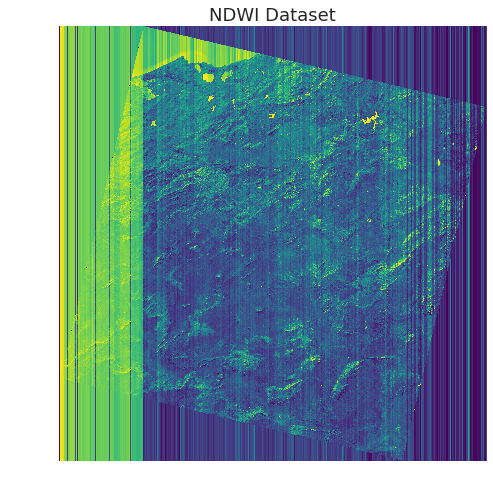

In [70]:

fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(X_scaled,cmap='viridis')
ax.set_title("NDWI Dataset")
ax.set_axis_off()

In [73]:
nom = 'LC08_L1TP_192035_20180105_20180118_01_T1_B3.TIF'.split("/")[-1][:-6]
nom

'LC08_L1TP_192035_20180105_20180118_01_T1_'

## From Here down I have a solution for the spatial library

In [0]:
!apt-get install -qq curl g++ make

In [87]:
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  556k  100  556k    0     0  2269k      0 --:--:-- --:--:-- --:--:-- 2269k


In [0]:
import os
os.chdir('spatialindex-src-1.8.5')

In [89]:
!./configure

checking build system type... x86_64-unknown-linux-gnu
checking for g++... g++
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking how to run the C++ preprocessor... g++ -E
checking for a BSD-compatible install... /usr/bin/install -c
checking whether ln -s works... yes
checking whether make sets $(MAKE)... yes
checking host system type... x86_64-unknown-linux-gnu
checking how to print strings... printf
checking for gcc... gcc
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking whether gcc understands -c and -o together... yes
checking for a sed that does not truncate output... /bin/sed
checking fo

In [90]:
!make

Making all in src
make[1]: Entering directory '/content/cloned-repo/extracted/spatialindex-src-1.8.5/src'
Making all in storagemanager
make[2]: Entering directory '/content/cloned-repo/extracted/spatialindex-src-1.8.5/src/storagemanager'
depbase=`echo Buffer.lo | sed 's|[^/]*$|.deps/&|;s|\.lo$||'`;\
/bin/bash ../../libtool  --tag=CXX   --mode=compile g++ -DPACKAGE_NAME=\"spatialindex\" -DPACKAGE_TARNAME=\"spatialindex-src\" -DPACKAGE_VERSION=\"1.8.5\" -DPACKAGE_STRING=\"spatialindex\ 1.8.5\" -DPACKAGE_BUGREPORT=\"mhadji@gmail.com\" -DPACKAGE_URL=\"\" -DSTDC_HEADERS=1 -DHAVE_SYS_TYPES_H=1 -DHAVE_SYS_STAT_H=1 -DHAVE_STDLIB_H=1 -DHAVE_STRING_H=1 -DHAVE_MEMORY_H=1 -DHAVE_STRINGS_H=1 -DHAVE_INTTYPES_H=1 -DHAVE_STDINT_H=1 -DHAVE_UNISTD_H=1 -DHAVE_DLFCN_H=1 -DLT_OBJDIR=\".libs/\" -DPACKAGE=\"spatialindex-src\" -DVERSION=\"1.8.5\" -DHAVE_FCNTL_H=1 -DHAVE_UNISTD_H=1 -DHAVE_SYS_TYPES_H=1 -DHAVE_SYS_STAT_H=1 -DHAVE_PTHREAD_H=1 -DHAVE_SYS_RESOURCE_H=1 -DHAVE_SYS_TIME_H=1 -DHAVE_STDINT_H=1 -DHAVE_F

In [91]:
!make install

Making install in src
make[1]: Entering directory '/content/cloned-repo/extracted/spatialindex-src-1.8.5/src'
Making install in storagemanager
make[2]: Entering directory '/content/cloned-repo/extracted/spatialindex-src-1.8.5/src/storagemanager'
make[3]: Entering directory '/content/cloned-repo/extracted/spatialindex-src-1.8.5/src/storagemanager'
make[3]: Nothing to be done for 'install-exec-am'.
make[3]: Nothing to be done for 'install-data-am'.
make[3]: Leaving directory '/content/cloned-repo/extracted/spatialindex-src-1.8.5/src/storagemanager'
make[2]: Leaving directory '/content/cloned-repo/extracted/spatialindex-src-1.8.5/src/storagemanager'
Making install in spatialindex
make[2]: Entering directory '/content/cloned-repo/extracted/spatialindex-src-1.8.5/src/spatialindex'
make[3]: Entering directory '/content/cloned-repo/extracted/spatialindex-src-1.8.5/src/spatialindex'
make[3]: Nothing to be done for 'install-exec-am'.
make[3]: Nothing to be done for 'install-data-am'.
make[3]: L

In [93]:
!pip install geopandas

In [0]:
!ldconfig

In [0]:
from rtree import index
from rtree.index import Rtree

In [97]:
p = index.Property()
idx = index.Index(properties=p)
idx

In [0]:
import earthpy.spatial as es

In [182]:
os.chdir('/content/cloned-repo/extracted')
all_landsat_post_bands = glob.glob("./LC08_L1TP_192035_20180105_20180118_01_T1_*.TIF")
all_landsat_post_bands.sort()
all_landsat_post_bands

['./LC08_L1TP_192035_20180105_20180118_01_T1_B1.TIF',
 './LC08_L1TP_192035_20180105_20180118_01_T1_B2.TIF',
 './LC08_L1TP_192035_20180105_20180118_01_T1_B3.TIF',
 './LC08_L1TP_192035_20180105_20180118_01_T1_B4.TIF',
 './LC08_L1TP_192035_20180105_20180118_01_T1_B5.TIF',
 './LC08_L1TP_192035_20180105_20180118_01_T1_B6.TIF',
 './LC08_L1TP_192035_20180105_20180118_01_T1_B7.TIF',
 './LC08_L1TP_192035_20180105_20180118_01_T1_B8.TIF',
 './LC08_L1TP_192035_20180105_20180118_01_T1_B9.TIF']

In [183]:
import rasterio as rio
import geopandas as gpd

array_stack, meta_data = es.stack(all_landsat_post_bands, nodata=-9999)
NDWI = es.normalized_diff(array_stack[4], array_stack[6])

ValueError: ignored

In [107]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(NDWI)
X_scaled = scaler.transform(NDWI)

os.chdir('/content/cloned-repo/extracted/')

nom = all_landsat_post_bands[0].split("/")[-1][:-6]

with rio.open(all_landsat_post_bands[0]) as src:
    data_ras = src.read()
    meta = src.profile

meta['dtype'] = "float64"

shape_extent = gpd.read_file('/content/POLYGON.shp')
se = shape_extent.to_crs("+proj=utm +zone=32 +ellps=WGS84 +datum=WGS84 +units=m +no_defs") 
extent_clip = mapping(se['geometry'][0])

crop_file, crop_affine = mask(X_scaled,[extent_clip],crop=True)
#matplotlib.image.imsave('./data/ndwi/' + str(i.split("/")[-1][:-4]) + '_subset.tif', crop_file[0])

ndwi_path = './' + str(nom.split("/")[-1][:-6]) + 'ndwi_small.tif'
with rio.open(ndwi_path, 'w', **meta) as dst:
    dst.write(crop_file[0], 1)

RasterioIOError: ignored

# Start here for files already downloaded


## load shapefile to clip all scenes

In [0]:
import geopandas as gpd

shape_extent = gpd.read_file('./data/shapefile/POLYGON.shp')
se = shape_extent.to_crs("+proj=utm +zone=32 +ellps=WGS84 +datum=WGS84 +units=m +no_defs") 
extent_clip = mapping(se['geometry'][0])

In [0]:
import glob
os.chdir('/content/')
all_indices=(glob.glob(".subset_data/*_ndwi"))

import rasterio
from rasterio.plot import plotting_extent
from rasterio.mask import mask
import matplotlib

for i in all_indices:
    sat_data = rasterio.open(i)
    crop_file, crop_affine = mask(sat_data,[extent_clip],crop=True)
    matplotlib.image.imsave('./data/ndwi/' + str(i.split("/")[-1][:-4]) + '_subset.tif', crop_file[0])

# load pre subset NDWI images


In [11]:
!git clone -l -s https://github.com/AVJdataminer/Tunisia_hydro.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.
/content/cloned-repo
LC08_L1TP_192035_20180105_20180118_ndwi_subset.tif  README.md
LC08_L1TP_192035_20180630_20180716_ndwi_subset.tif


In [13]:
all_clipped = os.listdir()
all_clipped

['LC08_L1TP_192035_20180105_20180118_ndwi_subset.tif',
 'LC08_L1TP_192035_20180630_20180716_ndwi_subset.tif',
 'README.md',
 '.git']

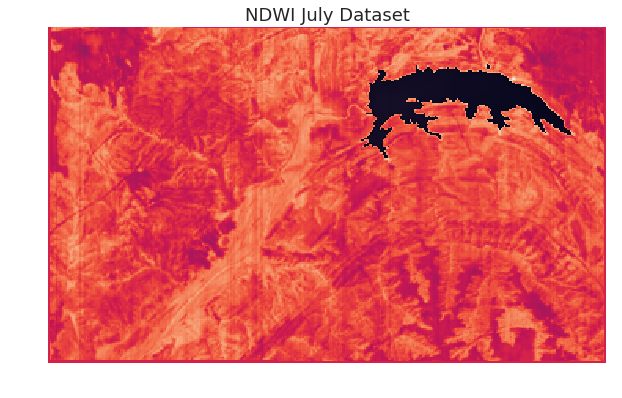

In [133]:
#plot each ndwi
from PIL import Image

ndwi_jan = Image.open('LC08_L1TP_192035_20180105_20180118_ndwi_subset.tif')
ndwi_jul = Image.open('LC08_L1TP_192035_20180630_20180716_ndwi_subset.tif')

fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(ndwi_jul,cmap='viridis')
ax.set_title("NDWI July Dataset")
ax.set_axis_off()


In [154]:
import earthpy.plot as ep
titles = ["Landsat 8 - Normalized Difference Water Index (NDWI)"]
a = np.array(ndwi_jan)
ep.plot_bands(a[: : 3], cmap="Spectral", cols=1, title=titles, scale=False, vmin=-1, vmax=1)

ValueError: ignored

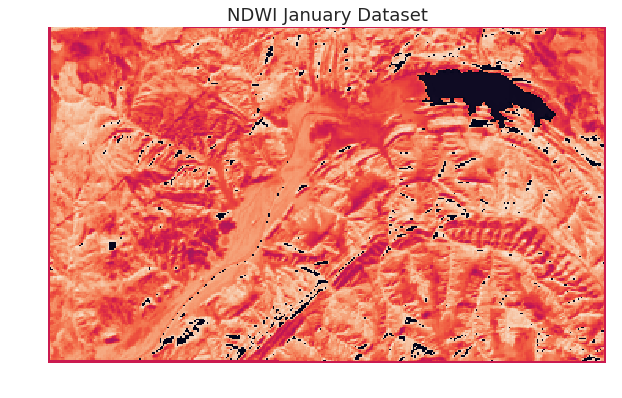

In [134]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(ndwi_jan,cmap='viridis')
ax.set_title("NDWI January Dataset")
ax.set_axis_off()

In [165]:
from matplotlib import pyplot as plt 
import numpy as np 
a = np.array(ndwi_jan)
a.shape

(214, 355, 4)

(array([ 10938.,   8095.,  36728.,  28353.,  22679.,  19981.,  16403.,
         12412.,  11023., 137268.]),
 array([  2. ,  27.3,  52.6,  77.9, 103.2, 128.5, 153.8, 179.1, 204.4,
        229.7, 255. ]),
 <a list of 10 Patch objects>)

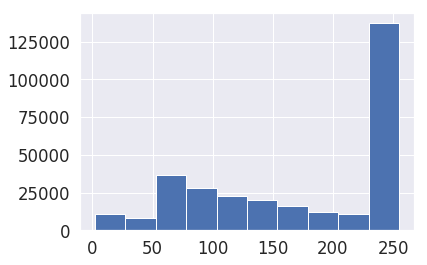

In [120]:
plt.hist(a.flatten())

In [0]:
newArr = a[a ==255]

In [167]:
newArr.shape

(75970,)

(array([ 14135.,  20183.,  70066.,  33601.,  11899.,   4289.,   1472.,
          7362.,  20832., 120041.]),
 array([  2. ,  27.3,  52.6,  77.9, 103.2, 128.5, 153.8, 179.1, 204.4,
        229.7, 255. ]),
 <a list of 10 Patch objects>)

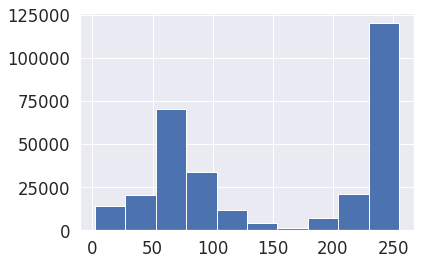

In [162]:
b = np.array(ndwi_jul)
plt.hist(b.flatten())

In [164]:
newArr = b[b ==255]
newArr.shape

(75970,)

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

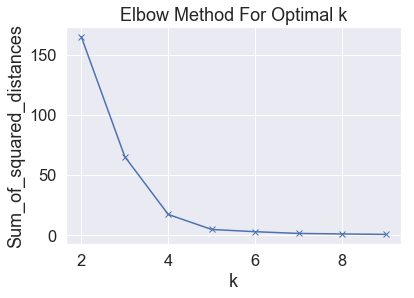

In [0]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = sklearn.cluster.KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [0]:
assigned_cluster.shape

(355,)

In [0]:
model = sklearn.cluster.KMeans(n_clusters=4)
assigned_cluster = model.fit_predict(NDWI[0].data[0].reshape(-1,1))